In [54]:
import pandas as pd
import random
import os
os.chdir('c:\\datacamp\\data')

# Writing Python Functions

## Chapter 3 - Decorators

### Functions are Objects

Decorators are ways to modify the behavior of functions. Because functions are just like any other object in Python, including a string or dataframe or integer, list, modules. This means it is possible to take actions on a function just like any other object. For example, a function could be assigned to a variable.

In [12]:
def my_func():
    print('Hello')
x = my_func
print(type(x))
x()

<class 'function'>
Hello


#### Functions in Lists or Dictionaries

Functions can also be added to a Python list or dictionary. Now an element of the list can be called and passed an argument. The same is true with values in a dictionary. 

In [9]:
list_of_functions = [my_func, open, print]
list_of_functions[2]("I am printing with an element of a list")

func_dict = {'func1':my_func, 'func2':open, 'func3':print}
func_dict['func3']("Now I am printing with a value from a dict")

I am printing with an element of a list
Now I am printing with a value from a dict


#### Referencing a Function

Notice that when a function is assigned to a variable, the parenthesis are not included. When the function name is typed with the parenthesis, the function is being called. If just the name of function is typed, it is referencing the function itself.

In [15]:
def my_function():
    return 42
my_function()

42

In [16]:
my_function

<function __main__.my_function()>

#### Functions as Arguments

Because a function is just another object, it can be passed as an argument to another function. For example, the has_docstring function checks to see if a function has a docstring. The yes and no functions have and don't have respectively, docstrings. When the yes and no functions are passed to the has_docstring function, the resulting bool is returned.

In [17]:
def has_docstring(func):
    '''Checks to see if the function has a docstring
    Args:
    func (callable): a function
    
    Returns:
    bool'''
    return func.__doc__ is not None 

def no():
    return 42

def yes():
    'I have a docstring'
    return 21

print(has_docstring(no))
print(has_docstring(yes))

False
True


#### Defining a Function Inside a Function

Functions defined inside other functions are referred to as nested functions, inner functions, helper functions or child functions. The function foo below prints x * y when x and y are with specific ranges. The foo function can be rewritten to be easier to read by creating a in_range nested function.

In [19]:
def foo(x,y):
    if x > 4 and x < 10 and y > 4 and y < 10:
        print(x*y)
        
def foo2(x,y):
    def in_range(v):
        return v > 4 and v < 10
    if in_range(x) and in_range(y):
        print (x*y)


### Exercise 1

#### Building a command line data app
You are building a command line tool that lets a user interactively explore a data set. We've defined four functions: mean(), std(), minimum(), and maximum() that users can call to analyze their data. Help finish this section of the code so that your users can call any of these functions by typing the function name at the input prompt.

Note: The function get_user_input() in this exercise is a mock version of asking the user to enter a command. It randomly returns one of the four function names. In real life, you would ask for input and wait until the user entered a value.

__Instructions:__
* Add the functions std(), minimum(), and maximum() to the function_map dictionary, like we did with mean().
* The name of the function the user wants to call is stored in func_name. Use the dictionary of functions, function_map, to call the chosen function and pass data as an argument.

In [33]:
# Recreate functions that DataCamp had preloaded
def mean(data):
    return data.mean()

def std(data):
    return data.std()

def minimum(data):
    return data.min()

def maximum(data):
    return data.max()

def get_user_input(input):
    print('Type a command')
    input = 'minimum'
    print(input)
    return input

def load_data():
    data = pd.read_csv('data.csv')
    return data
    
# Add the missing function references to the function map
function_map = {
  'mean': mean, 
  'std': std,
  'minimum': minimum,
  'maximum': maximum
}

data = load_data()
print(data)

func_name = get_user_input('mean')

# Call the chosen function and pass "data" as an argument
function_map[func_name](data)

   height  weight
0    72.1     198
1    69.8     204
2    63.2     164
3    64.7     238
Type a command
minimum


height     63.2
weight    164.0
dtype: float64

#### Returning functions for a math game
You are building an educational math game where the player enters a math term, and your program returns a function that matches that term. For instance, if the user types "add", your program returns a function that adds two numbers. So far you've only implemented the "add" function. Now you want to include a "subtract" function.

__Instructions:__
* Define the subtract() function. It should take two arguments and return the first argument minus the second argument.

In [34]:
def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    # Define the subtract() function
    def subtract(a,b):
      return a - b
    return subtract
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

5 + 2 = 7
5 - 2 = 3


### Scope

Scope determines which variables can be accessed at different points in the code. Python has strict rules that the interpreter follows when determining which variable name the code is referring to within a function. 

First the interpreter will look within the local scope which is made of the arguments and any variables that are defined inside the function. If the variable cannot be found in the local scope, it expands the search to the nonlocal scope, if the current function is actually nested within another function. The nonlocal scope would be the local scope of the parent function. If it cannot find the variable in the nonlocal scope, or if the function is not nested, Python then goes to the global scope which contains the code defined variables created outside of the function. If the variable cannot be found in the global scope, the interpreter will check the built in scope which are all the objects available in Python. For example, the print() function is a built in to Python and that is why it can be called within the foo function. 

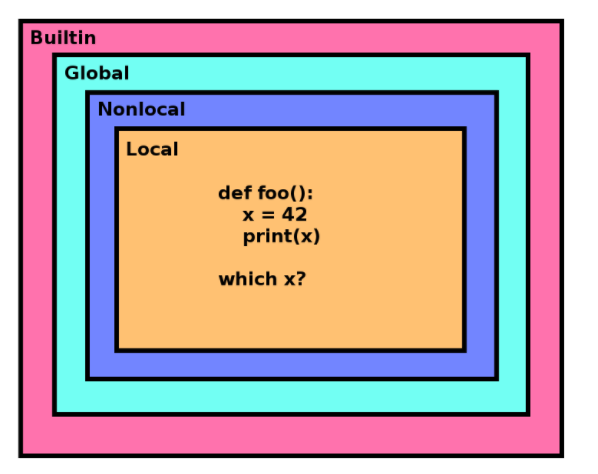

Python only allows read access to variables that are defined outside of the current scope. In the example below, when the foo() function is called, it will print 42, the value of x within the foo() function. Outside of the foo() function, when print(x) is called again, it will print 7, the global value of x. 

In [37]:
x = 7

def foo():
    x = 42
    print(x)

foo()
print(x)

42
7


#### The Global Keyword

If there is a need to refer to the global value of x within the foo() function, placing the keyword global in front of x will enable the function to use the global variable x and in the example below, change the value of x. Note that now when print(x) is called outside of the foo() function, it prints 42. Calling global variables within a function should be avoided as it can make testing and debugging more difficult.

In [38]:
x = 7

def foo():
    global x
    x = 42
    print(x)

foo()
print(x)

42
42


#### The Nonlocal Keyword

Similar to referring to a global variable within a function, using the keyword nonlocal in front a variable being used in a nested function will point the variable of the same name in the parent function. 

In [42]:
def foo():
    x = 10
    def bar():
        x = 200
        print(x)
    bar()
    print(x)

foo()

200
10


In [43]:
def foo():
    x = 10
    def bar():
        nonlocal x
        x = 200
        print(x)
    bar()
    print(x)

foo()

200
200


### Exercise 2

#### Modifying variables outside local scope
Sometimes your functions will need to modify a variable that is outside of the local scope of that function. While it's generally not best practice to do so, it's still good to know-how in case you need to do it. Update these functions so they can modify variables that would usually be outside of their scope.

__Instructions:__
* Add a keyword that lets us update call_count from inside the function.
* Add a keyword that lets us modify file_contents from inside save_contents().
* Add a keyword to done in check_is_done() so that wait_until_done() eventually stops looping.

In [58]:
call_count = 0

def my_function():
  # Use a keyword that lets us update call_count 
  global call_count
  call_count += 1
  
  print("You've called my_function() {} times!".format(call_count))
  
for _ in range(20):
  my_function()

def read_files():
  file_contents = None
  
  def save_contents(filename):
    # Add a keyword that lets us modify file_contents
    nonlocal file_contents
    if file_contents is None:
      file_contents = []
    with open(filename) as fin:
      file_contents.append(fin.read())
      
  for filename in ['1984-1.txt', 'Moby-1.txt', 'Huck-1.txt']:
    save_contents(filename)
    
  return file_contents

print('\n'.join(read_files()))

def wait_until_done():
  def check_is_done():
    # Add a keyword so that wait_until_done() doesn't run forever
    global done
    if random.random() < 0.1:
      done = True
      
  while not done:
    check_is_done()

done = False
wait_until_done()

print('Work done? {}'.format(done))

You've called my_function() 1 times!
You've called my_function() 2 times!
You've called my_function() 3 times!
You've called my_function() 4 times!
You've called my_function() 5 times!
You've called my_function() 6 times!
You've called my_function() 7 times!
You've called my_function() 8 times!
You've called my_function() 9 times!
You've called my_function() 10 times!
You've called my_function() 11 times!
You've called my_function() 12 times!
You've called my_function() 13 times!
You've called my_function() 14 times!
You've called my_function() 15 times!
You've called my_function() 16 times!
You've called my_function() 17 times!
You've called my_function() 18 times!
You've called my_function() 19 times!
You've called my_function() 20 times!
It was a bright cold day in April, and the clocks were striking thirteen. 
Call me Ishmael. 
YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain't no matter.
Work done? True


Stellar scoping! By adding global done in check_is_done(), you ensure that the done being referenced is the one that was set to False before wait_until_done() was called. Without this keyword, wait_until_done() would loop forever because the done = True in check_is_done() would only be changing a variable that is local to check_is_done(). Understanding what scope your variables are in will help you debug tricky situations like this one.

### Closures

A closure in Python is a tuple of variables that are no longer is scope but a function needs in order to run. In this example, the foo() function defines the variable a and then returns the nested function bar(). When the func variable is set to the execution of the function foo(), it is really being set to the function bar(), but when the func variable is called, it still prints the variable a, even though a is NOT in the scope of bar(). This is accomplished with closures. When foo() returned the bar() function, Python included any non local variable that bar() was going to need to the function object. Those variables get stored in a tuple in the double underscore closure attribute of the function. 

The closure for func has one variable and that variable can be viewed by accessing the .cell_contents of the item. 

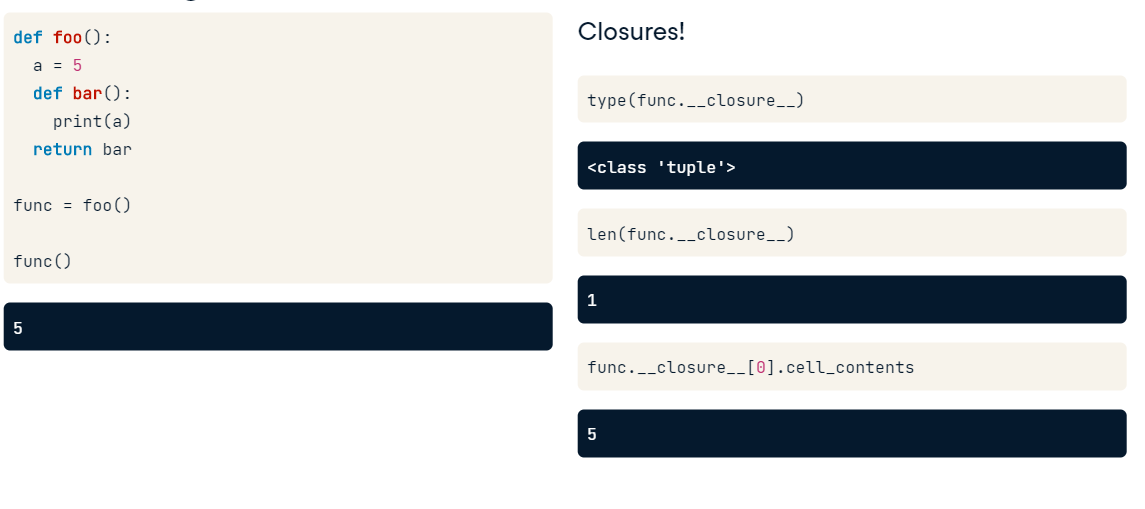

#### Closures and Deletions

In this example below, the my_func variable is assigned to the foo() function that returns the nested function bar(). When my_func is called, with the global variable x, the bar() function prints 25, the value of x. If the code then should delete the global variable x and the variable my_func is called again, it will still print 25, as the value argument of foo() gets added to the closure attribute of my_func when it is assigned to the foo() function because it is a required variable for the nested function bar(). So even though x doesn't exist anymore, its value still persists in my_func's closure.
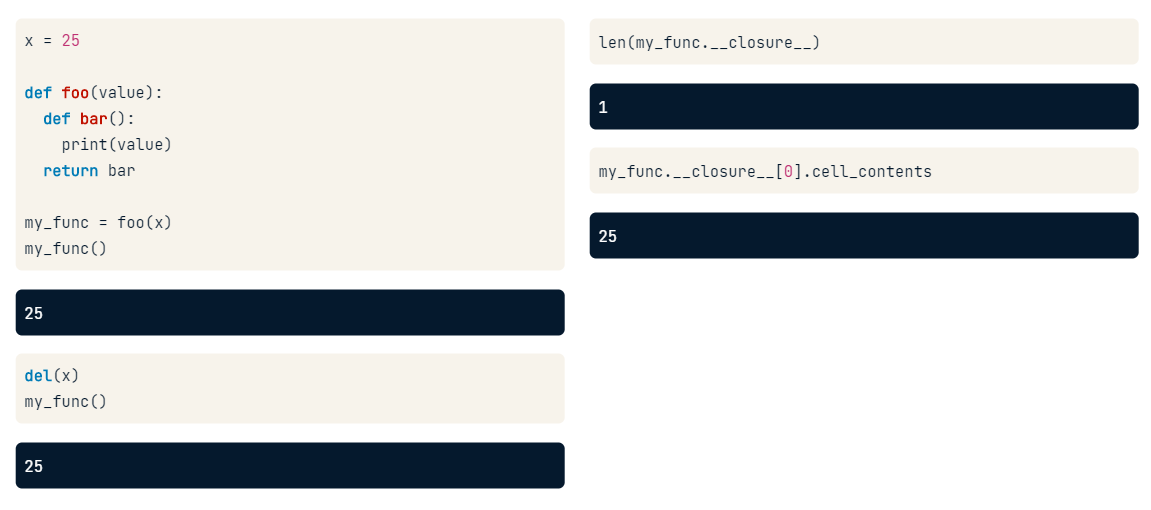

#### Closures and Overwrites

Notice that nothing changes when x is overwritten instead of deleting it. In this example, x is assigned the value of 25, then the function foo() is created to accept a value and return the function bar(). Then x is reassigned to the function foo() with x provided as its value. When x() is called, it returns 25. This is because the new variable of x still has 25 stored in its closure. This is important to remember when using decorators.

In [59]:
x = 25

def foo(value):
    def bar():
        print(value)
    return bar

x = foo(x)
x()

25


In [60]:
x

<function __main__.foo.<locals>.bar()>

#### Why Does All of This Matter?

Decorators use all these capabilities discussed:
* Functions as objects
* Nested functions
* Nonlocal scope
* Closures

### Exercise 3

#### Checking for closure
You're teaching your niece how to program in Python, and she is working on returning nested functions. She thinks she has written the code correctly, but she is worried that the returned function won't have the necessary information when called. Show her that all of the nonlocal variables she needs are in the new function's closure.

__Instructions:__
* Use an attribute of the my_func() function to show that it has a closure that is not None.
* Show that there are two variables in the closure.
* Get the values of the variables in the closure so you can show that they are equal to [2, 17], the arguments passed to return_a_func().

In [62]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

# Show that there are two variables in the closure
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

True
True
True


Values get added to a function's closure in the order they are defined in the enclosing function (in this case, arg1 and then arg2), but only if they are used in the nested function. That is, if return_a_func() took a third argument (e.g., arg3) that wasn't used by new_func(), then it would not be captured in new_func()'s closure.

#### Closures keep your values safe
You are still helping your niece understand closures. You have written the function get_new_func() that returns a nested function. The nested function call_func() calls whatever function was passed to get_new_func(). You've also written my_special_function() which simply prints a message that states that you are executing my_special_function().

You want to show your niece that no matter what you do to my_special_function() after passing it to get_new_func(), the new function still mimics the behavior of the original my_special_function() because it is in the new function's closure.

__Instructions:__
* Show that you still get the original message even if you redefine my_special_function() to only print "hello".
* Show that even if you delete my_special_function(), you can still call new_func() without any problems.
* Show that you still get the original message even if you overwrite my_special_function() with the new function.

In [70]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print('hello')

new_func()

# Delete my_special_function()
del(my_special_function)

new_func()

You are running my_special_function()
You are running my_special_function()


In [69]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

You are running my_special_function()


### Decorators

A decorator is a wrapper that changes the default behavior of a function. Decorators can modify the input values, modify the outputs of a function and even change the way a function behaves. Decorators are placed above a newly created function and start with the @ symbol, followed by the decorator's name. 

#### Creating a Decorator

In this example, a function called double_args() takes the arguments of a function and multiplies them by 2. When the double_args() function is applied to multiply() function and assigned to the variable new_multiply and new_multiply is called, the values passed are multiplied by 2 before being multiplied together. 

In [77]:
def double_args(func):
    def wrapper(a, b):
        #Call the passed function, but double each argument
        return func(a*2, b*2)
    return wrapper

def multiply(a, b):
    #multiply together the valued passed
    return a * b

new_multiply = double_args(multiply)
new_multiply(1,5)

20

Rather than assigning the new function created by double_args() to a new variable name, it can be assigned to the multiply variable name, the same name as the original function, because Python stores the original multiply() function in the new multiply() function's closure.

In [83]:
def multiply(a, b):
    return a * b
print(multiply(1,5))

multiply = double_args(multiply)
print(multiply(1,5))

multiply.__closure__[0].cell_contents

5
20


<function __main__.multiply(a, b)>

#### Decorator Syntax

Using the @decorator_name syntax is a more convenient way of saying multiply() equals the value returned by calling double_args() with multiply() as the value. The code on the left is the equivalent of the code on the right.

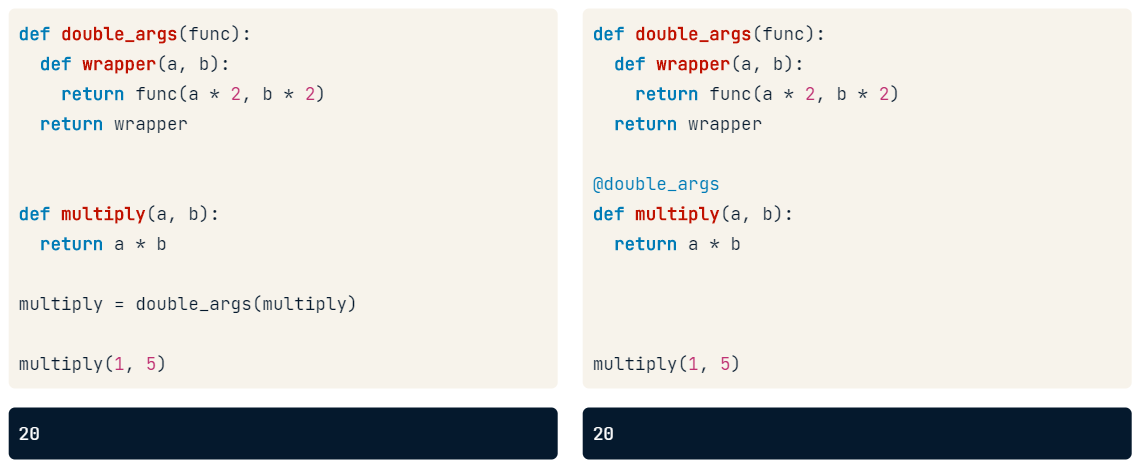

### Exercise 4

#### Using decorator syntax
You have written a decorator called print_args that prints out all of the arguments and their values any time a function that it is decorating gets called.

__Instructions:__
* Decorate my_function() with the print_args() decorator by redefining my_function().
* Decorate my_function() with the print_args() decorator using decorator syntax.

In [1]:
# Recreate the print_args() function that Datacamp has built in
def print_args(func):
    def wrapper(x, y, z):
        print('My function was called with values a:{}, b:{}, c:{}'.format(x,y,z))
        return func
    return wrapper

def my_function(a, b, c):
  print(a + b + c)

# Decorate my_function() with the print_args() decorator
my_function = print_args(my_function)

my_function(1, 2, 3)

# Decorate my_function() with the print_args() decorator
@print_args
def my_function(a, b, c):
  print(a + b + c)

my_function(1, 2, 3)

My function was called with values a:1, b:2, c:3
<class 'int'>
My function was called with values a:1, b:2, c:3
<class 'int'>


<function __main__.my_function(a, b, c)>

#### Defining a decorator
Your buddy has been working on a decorator that prints a "before" message before the decorated function is called and prints an "after" message after the decorated function is called. They are having trouble remembering how wrapping the decorated function is supposed to work. Help them out by finishing their print_before_and_after() decorator.

__Instructions:__
* Call the function being decorated and pass it the positional arguments args.
* Return the new decorated function.

In [108]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

Before multiply
50
After multiply
